# HW 10 CLUSTERING BUSINESS

# cluster time trends in NYC businesses: 
# DATA
# Census Business data:
## download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
##  you can  download it with 4 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import ast
#from cStringIO import StringIO
import os
import json
import requests
#import urllib2
import urllib
import shapely
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# Using the last development version of geopandas at this time
# pip install git+git://github.com/geopandas/geopandas.git
import geopandas as gd
import fiona

from fiona.crs import from_epsg
import matplotlib.pylab as pl
from matplotlib import colors

In [ ]:
for i in range(93,100):#94,95,96,97,98,99
    st=str(i)
    print "ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp"+ str(i) +"totals.zip"
    fileUrl = "ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp"+ str(i) +"totals.zip"
    os.system("curl -o zbp"+ st +"totals.zip " + fileUrl)
    os.system("mv zbp"+ st +"totals.zip " + os.getenv("PUIDATA"))

In [ ]:
#done
for i in range(0,2):#00,01
    st=str(i)
    print "ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0"+ str(i) +"totals.zip"
    fileUrl = "ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0"+ str(i) +"totals.zip"
    os.system("curl -o zbp0"+ st +"totals.zip " + fileUrl)
    os.system("mv zbp0"+ st +"totals.zip " + os.getenv("PUIDATA")+'/')

In [ ]:
for i in range(2,10):#02,03,04,05,06,07,08,09
    st=str(i)
    print "ftp://ftp.census.gov/econ200"+ str(i) +"/CBP_CSV/zbp0"+ str(i) +"totals.zip"
    fileUrl = "ftp://ftp.census.gov/econ200"+ str(i) +"/CBP_CSV/zbp0"+ str(i) +"totals.zip"
    os.system("curl -o zbp0"+ st +"totals.zip " + fileUrl)
    os.system("mv zbp0"+ st +"totals.zip " + os.getenv("PUIDATA")+'/')

In [ ]:
for i in range(15,16):#10,11,12,13,14,
    st=str(i)
    print "ftp://ftp.census.gov/econ20"+ str(i) +"/CBP_CSV/zbp"+ str(i) +"totals.zip"
    fileUrl = "ftp://ftp.census.gov/econ20"+ str(i) +"/CBP_CSV/zbp"+ str(i) +"totals.zip"
    os.system("curl -o zbp"+ st +"totals.zip " + fileUrl)
    os.system("mv zbp"+ st +"totals.zip " + os.getenv("PUIDATA")+'/')

In [ ]:
for i in range(93,100):#94,95,96,97,98,99

for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

for ((y=0; y<=1; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

for ((y=2; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [217]:
import pandas as pd

import zipfile #i am not giving it a name cause i intend to use it only once

fname='zbp95totals.zip'
zf = zipfile.ZipFile(os.getenv("PUIDATA")+'/'+fname)
df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
print df.shape
df.head()

(39932, 7)


,zip,name,empflag,emp,qp1,ap,est
0,501,"Holtsville, NY",B,0,0,0,2
1,1000,"Springfield, MA",NaN,49,529,2127,4
2,1001,"Agawam, MA",NaN,5920,32993,152512,439
3,1002,"Amherst, MA",NaN,6153,31645,132699,467
4,1003,"Amherst, MA",NaN,89,380,1698,10


In [218]:
years=['94','95','96','97','98','99','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14']
len(years)

21

In [219]:
fname='zbp'+years[0]+'totals.zip'
zf = zipfile.ZipFile(os.getenv("PUIDATA")+'/'+fname)
df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))

df = df[['zip','est']]
df.columns = ['zip', 'est_'+years[0]]
print df.shape
df.head()

(39259, 2)


,zip,est_94
0,1001,439
1,1002,450
2,1003,10
3,1004,47
4,1005,92


In [220]:
df.columns


Index([u'zip', u'est_94'], dtype='object')

In [221]:
for i in range((len(years)-1)):
    fname='zbp'+years[i+1]+'totals.zip'
    #print fname
    zf = zipfile.ZipFile(os.getenv("PUIDATA")+'/'+fname)
    df2 = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df2.columns = [j.lower() for j in df2.columns]
    df2 = df2[['zip','est']]
    df2.columns = ['zip', 'est_'+years[i+1]]
    #df = pd.concat([df, df2], axis=1, join_axes=df[zip])
    df=pd.merge(df, df2, how='inner', on='zip')
    print df.shape
df.head()

(38871, 3)
(38613, 4)
(38306, 5)
(37809, 6)
(37694, 7)
(37595, 8)
(37482, 9)
(37187, 10)
(37097, 11)
(37029, 12)
(36947, 13)
(36856, 14)
(36726, 15)
(36434, 16)
(36357, 17)
(36291, 18)
(36220, 19)
(36014, 20)
(35954, 21)
(35885, 22)


,zip,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
0,1001,439,439,433,457,444,469,493,490,490,...,509,509,503,477,458,448,436,453,439,458
1,1002,450,467,487,500,490,558,563,587,566,...,589,582,596,584,571,570,558,572,572,560
2,1003,10,10,13,15,14,13,13,13,15,...,12,12,16,17,16,16,16,15,15,18
3,1004,47,48,47,41,31,35,48,37,23,...,31,30,20,18,18,21,19,16,16,13
4,1005,92,95,101,104,95,82,86,90,94,...,94,98,106,97,87,96,91,94,97,97


# NYC zip codes shape file is here
## http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981

This website id currently down. I uploaded the geojson file in the github repo as well

In [222]:
dftime=df.copy(deep=True)

In [223]:
dftime.columns
dftime.rename(columns={'zip':'postalCode'},inplace=True)  # mapping, changes labels
dftime = dftime.set_index('postalCode')
dftime.head()

,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
postalCode,,,,,,,,,,,,,,,,,,,,,
1001,439,439,433,457,444,469,493,490,490,505,...,509,509,503,477,458,448,436,453,439,458
1002,450,467,487,500,490,558,563,587,566,586,...,589,582,596,584,571,570,558,572,572,560
1003,10,10,13,15,14,13,13,13,15,16,...,12,12,16,17,16,16,16,15,15,18
1004,47,48,47,41,31,35,48,37,23,21,...,31,30,20,18,18,21,19,16,16,13
1005,92,95,101,104,95,82,86,90,94,93,...,94,98,106,97,87,96,91,94,97,97


In [224]:
dftime.shape

(35885, 21)

mask=[]
for index in dftime.index:
    if dftime.ix[index].count()>=20:
        print dftime.ix[index].count()
        mask.append(index)

In [226]:
filepath = "nyc-zip-code-tabulation-areas-polygons.geojson"
NYCshape = gd.GeoDataFrame.from_file(filepath)
NYCshape = NYCshape[['postalCode','geometry']]
NYCshape.head()

,postalCode,geometry
0,11372,POLYGON ((-73.86942457284175 40.74915687096787...
1,11004,POLYGON ((-73.71068374074007 40.75004039450917...
2,11040,POLYGON ((-73.70098278625547 40.73889569923034...
3,11426,POLYGON ((-73.72270447144122 40.75373371438336...
4,11365,POLYGON ((-73.81088634744755 40.72717187575918...


In [227]:
dftimeNYC=dftime.ix[list(map(int, NYCshape.postalCode))]

In [228]:
dftimeNYC.head()

,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
postalCode,,,,,,,,,,,,,,,,,,,,,
11372,1229.0,1236.0,1292.0,1309.0,1351.0,1376.0,1409.0,1408.0,1463.0,1521.0,...,1539.0,1527.0,1545.0,1538.0,1572.0,1629.0,1647.0,1724.0,1759.0,1768.0
11004,194.0,188.0,176.0,192.0,194.0,186.0,189.0,204.0,214.0,228.0,...,225.0,226.0,238.0,227.0,233.0,229.0,222.0,241.0,241.0,250.0
11040,1422.0,1414.0,1335.0,1344.0,1344.0,1350.0,1350.0,1341.0,1398.0,1403.0,...,1441.0,1454.0,1488.0,1503.0,1475.0,1494.0,1488.0,1510.0,1539.0,1534.0
11426,326.0,219.0,209.0,198.0,203.0,217.0,213.0,217.0,207.0,211.0,...,226.0,226.0,228.0,226.0,237.0,248.0,256.0,266.0,258.0,260.0
11365,492.0,476.0,483.0,522.0,509.0,519.0,553.0,574.0,574.0,582.0,...,604.0,608.0,617.0,616.0,628.0,643.0,677.0,679.0,714.0,731.0


In [229]:
#dftimeNYC.ix[11372].count()>20
sum(dftimeNYC.count(axis=1)>=20)

243

In [235]:
dftimeNYCclean=dftimeNYC[(dftimeNYC.count(axis=1)>=20)]
print dftimeNYCclean.shape
dftimeNYCclean.head()


(243, 21)


,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
postalCode,,,,,,,,,,,,,,,,,,,,,
11372,1229.0,1236.0,1292.0,1309.0,1351.0,1376.0,1409.0,1408.0,1463.0,1521.0,...,1539.0,1527.0,1545.0,1538.0,1572.0,1629.0,1647.0,1724.0,1759.0,1768.0
11004,194.0,188.0,176.0,192.0,194.0,186.0,189.0,204.0,214.0,228.0,...,225.0,226.0,238.0,227.0,233.0,229.0,222.0,241.0,241.0,250.0
11040,1422.0,1414.0,1335.0,1344.0,1344.0,1350.0,1350.0,1341.0,1398.0,1403.0,...,1441.0,1454.0,1488.0,1503.0,1475.0,1494.0,1488.0,1510.0,1539.0,1534.0
11426,326.0,219.0,209.0,198.0,203.0,217.0,213.0,217.0,207.0,211.0,...,226.0,226.0,228.0,226.0,237.0,248.0,256.0,266.0,258.0,260.0
11365,492.0,476.0,483.0,522.0,509.0,519.0,553.0,574.0,574.0,582.0,...,604.0,608.0,617.0,616.0,628.0,643.0,677.0,679.0,714.0,731.0


In [242]:

(dftimeNYCclean.iloc[0] - dftimeNYCclean.iloc[0].mean())/ dftimeNYCclean.iloc[0].std()

est_94   -1.650515
est_95   -1.607088
est_96   -1.259673
est_97   -1.154208
est_98   -0.893647
est_99   -0.738551
est_00   -0.533825
est_01   -0.540029
est_02   -0.198818
est_03    0.161004
est_04    0.365731
est_05    0.272673
est_06    0.198227
est_07    0.309896
est_08    0.266469
est_09    0.477400
est_10    0.831018
est_11    0.942687
est_12    1.420382
est_13    1.637516
est_14    1.693350
Name: 11372, dtype: float64

In [244]:
final = dftimeNYCclean.copy(deep=True)

In [245]:
for i in range(len(dftimeNYCclean)):
    final.iloc[i] = (dftimeNYCclean.iloc[i] - dftimeNYCclean.iloc[i].mean())/ dftimeNYCclean.iloc[i].std()

In [246]:
final.head()

,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
postalCode,,,,,,,,,,,,,,,,,,,,,
11372,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,-0.198818,0.161004,...,0.272673,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350
11004,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,-0.062943,0.575171,...,0.438432,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923
11040,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,-0.465989,-0.393502,...,0.157401,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662
11426,3.212291,-0.444253,-0.785986,-1.161892,-0.991026,-0.512600,-0.649293,-0.512600,-0.854333,-0.717639,...,-0.205040,-0.205040,-0.136693,-0.205040,0.170867,0.546773,0.820159,1.161892,0.888506,0.956853
11365,-1.332578,-1.549090,-1.454366,-0.926619,-1.102534,-0.967215,-0.507127,-0.222956,-0.222956,-0.114700,...,0.183004,0.237132,0.358920,0.345388,0.507772,0.710751,1.170839,1.197903,1.671522,1.901566


In [267]:
final.ix[11372]

est_94   -1.650515
est_95   -1.607088
est_96   -1.259673
est_97   -1.154208
est_98   -0.893647
est_99   -0.738551
est_00   -0.533825
est_01   -0.540029
est_02   -0.198818
est_03    0.161004
est_04    0.365731
est_05    0.272673
est_06    0.198227
est_07    0.309896
est_08    0.266469
est_09    0.477400
est_10    0.831018
est_11    0.942687
est_12    1.420382
est_13    1.637516
est_14    1.693350
Name: 11372, dtype: float64

In [251]:
type(final.iloc[0][-1])

numpy.float64

In [280]:
len(final.columns)
np.arange(1,22)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [285]:
final.head()

,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
postalCode,,,,,,,,,,,,,,,,,,,,,
11372,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,-0.738551,-0.533825,-0.540029,-0.198818,0.161004,...,0.272673,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350
11004,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,-1.339172,-1.202433,-0.518739,-0.062943,0.575171,...,0.438432,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923
11040,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,-1.161866,-1.161866,-1.292342,-0.465989,-0.393502,...,0.157401,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662
11426,3.212291,-0.444253,-0.785986,-1.161892,-0.991026,-0.512600,-0.649293,-0.512600,-0.854333,-0.717639,...,-0.205040,-0.205040,-0.136693,-0.205040,0.170867,0.546773,0.820159,1.161892,0.888506,0.956853
11365,-1.332578,-1.549090,-1.454366,-0.926619,-1.102534,-0.967215,-0.507127,-0.222956,-0.222956,-0.114700,...,0.183004,0.237132,0.358920,0.345388,0.507772,0.710751,1.170839,1.197903,1.671522,1.901566


In [330]:
len(list(final.columns))
final.columns

Index([u'est_94', u'est_95', u'est_96', u'est_97', u'est_98', u'est_99',
       u'est_00', u'est_01', u'est_02', u'est_03', u'est_04', u'est_05',
       u'est_06', u'est_07', u'est_08', u'est_09', u'est_10', u'est_11',
       u'est_12', u'est_13', u'est_14'],
      dtype='object')

In [344]:
range(1, 22) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

[]

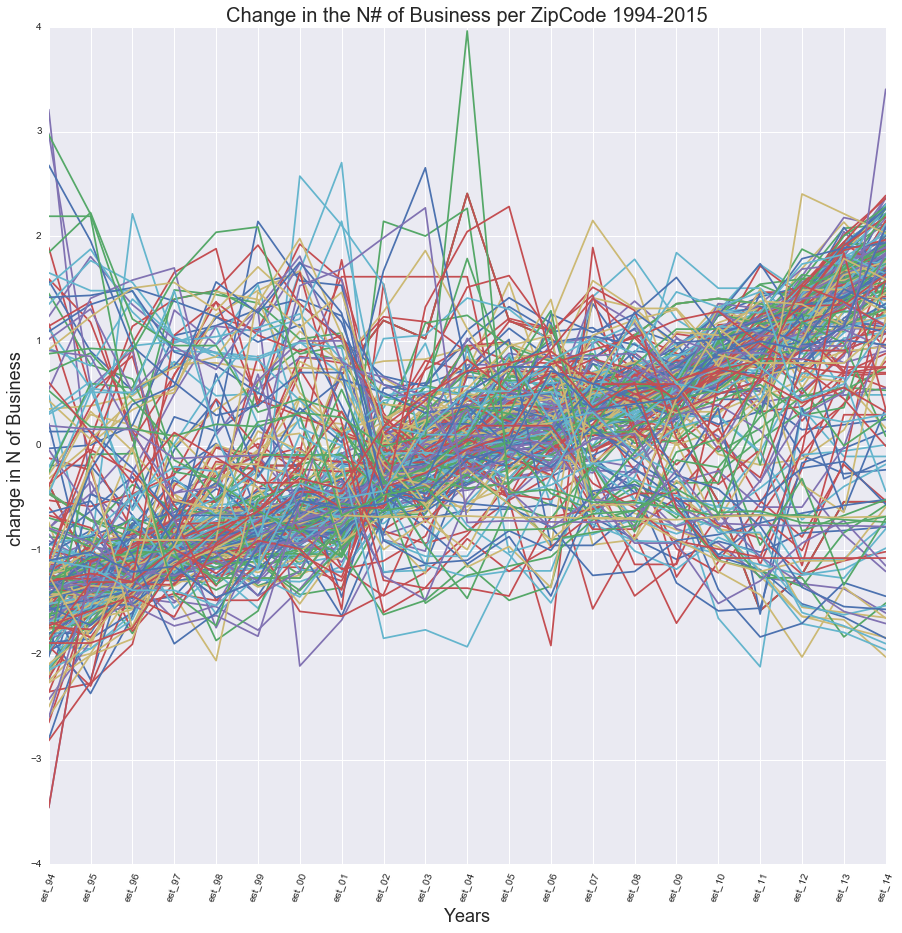

In [345]:
ax=pl.figure(figsize = (15,15))
x=0
for i in range(len(final)):
    x+=1
    #print final.ix[index]
    #print np.arange(1,22),x
    pl.plot(np.arange(1,22),final.iloc[i], alpha=1)
pl.title('Change in the N# of Business per ZipCode 1994-2015', size = 20)
pl.ylabel('change in N of Business ', size = 18)
pl.xlabel('Years', size = 18)
#pl.set_xticks_position('right')
pl.xticks( range(1, 22) , list(final.columns), rotation=70, )
#ax.tick_label(list(final.columns)) 
#pl.legend(loc = 3, fontsize = 20)
pl.plot()


In [349]:
import sklearn
from sklearn import mixture

clusters = 5
samples = final
clusterkmean = sklearn.cluster.KMeans(n_clusters=clusters)
cluster_labels = clusterkmean.fit_predict(samples)
print cluster_labels
len(cluster_labels)

[2 2 2 0 2 2 2 2 2 3 2 3 2 3 2 2 2 3 2 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 0 0 3 2 2 2 4 2 2 2 2 2 3 2 3 2 2 4 4 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2
 3 2 2 2 3 2 3 2 2 2 3 2 3 3 3 1 3 2 3 2 1 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 0
 1 3 3 4 2 1 2 3 2 2 3 2 2 3 1 2 4 2 2 1 2 1 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 4 2 2 4 2 3 0 2 2 0 2 2 2 2 3 3 3 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2
 2 3 2 3 2 3 4 1 0 4 0 1 1 4 1 1 4 3 1 0 1 0 2 1 1 2 0 1 2 0 1 1 0 4 1 1 1
 1 1 3 1 2 1 1 0 2 0 3 0 1 4 4 1 1 3 2 1 3]


243

In [352]:
clusterkmean.cluster_centers_.shape

(5L, 21L)

In [360]:
clusterkmean.cluster_centers_[4]

array([-1.03803209, -0.8711333 , -0.68546026, -0.32731594, -0.21383426,
       -0.1308188 ,  0.39390825,  0.59968633,  0.73569432,  0.83159704,
        1.49394756,  0.75460566,  0.48058164,  0.19590059, -0.10885036,
       -0.4235272 , -0.48513098, -0.76255801, -0.42881774, -0.02811969,
        0.01767724])

[]

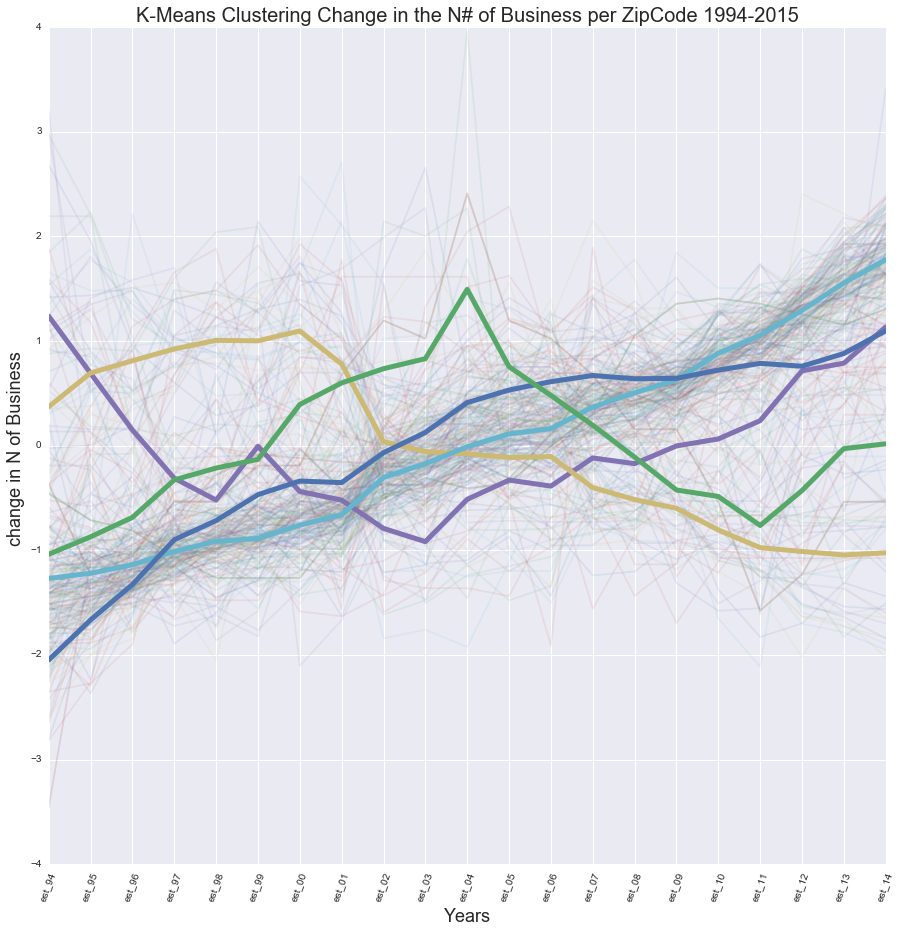

In [383]:
ax=pl.figure(figsize = (15,15))
x=0
for i in range(len(final)):
    x+=1
    #print final.ix[index]
    #print np.arange(1,22),x
    pl.plot(np.arange(1,22),final.iloc[i], alpha=.1)
for j in range(len(clusterkmean.cluster_centers_)):
    pl.plot(np.arange(1,22),clusterkmean.cluster_centers_[j], linewidth=5, alpha=1)    
pl.title('K-Means Clustering Change in the N# of Business per ZipCode 1994-2015', size = 20)
pl.ylabel('change in N of Business ', size = 18)
pl.xlabel('Years', size = 18)
#pl.set_xticks_position('right')
pl.xticks( range(1, 22) , list(final.columns), rotation=70, )
#ax.tick_label(list(final.columns)) 
#pl.legend(loc = 3, fontsize = 20)
pl.plot()

In [365]:
from sklearn.cluster import DBSCAN

In [378]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=clusters,random_state=324)
res1=gm.fit(final)

In [382]:
len(res1.means_)

5

[]

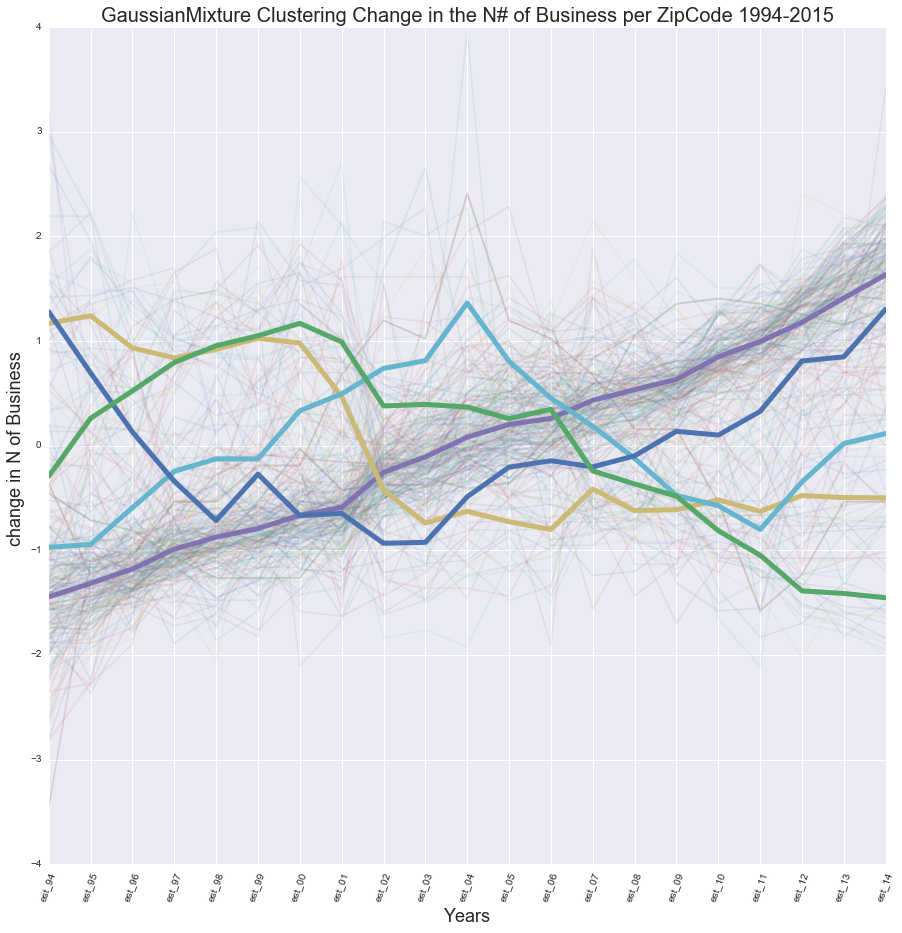

In [384]:
ax=pl.figure(figsize = (15,15))
x=0
for i in range(len(final)):
    x+=1
    #print final.ix[index]
    #print np.arange(1,22),x
    pl.plot(np.arange(1,22),final.iloc[i], alpha=.1)
for j in range(len(res1.means_)):
    pl.plot(np.arange(1,22),res1.means_[j], linewidth=5, alpha=1)    
pl.title('GaussianMixture Clustering Change in the N# of Business per ZipCode 1994-2015', size = 20)
pl.ylabel('change in N of Business ', size = 18)
pl.xlabel('Years', size = 18)
#pl.set_xticks_position('right')
pl.xticks( range(1, 22) , list(final.columns), rotation=70, )
#ax.tick_label(list(final.columns)) 
#pl.legend(loc = 3, fontsize = 20)
pl.plot()

In [418]:
formerge = final.copy(deep=True)

In [419]:
formerge['KMeaLabel']=cluster_labels
formerge['GaussianLabel']=res1.predict(final)
formerge=formerge[['KMeaLabel','GaussianLabel']]
formerge.reset_index(inplace=True)
formerge.head()

,postalCode,KMeaLabel,GaussianLabel
0,11372,2,0
1,11004,2,0
2,11040,2,0
3,11426,0,3
4,11365,2,0


In [424]:
formerge.postalCode=formerge.postalCode.apply(str)
formerge.postalCode[0]

'11372'

In [425]:
NYCshpclusters=pd.merge(NYCshape, formerge, how='inner', on='postalCode')
NYCshpclusters.head()

,postalCode,geometry
0,11372,POLYGON ((-73.86942457284175 40.74915687096787...
1,11004,POLYGON ((-73.71068374074007 40.75004039450917...
2,11040,POLYGON ((-73.70098278625547 40.73889569923034...
3,11426,POLYGON ((-73.72270447144122 40.75373371438336...
4,11365,POLYGON ((-73.81088634744755 40.72717187575918...


In [427]:
len(NYCshpclusters)
#.head()

283

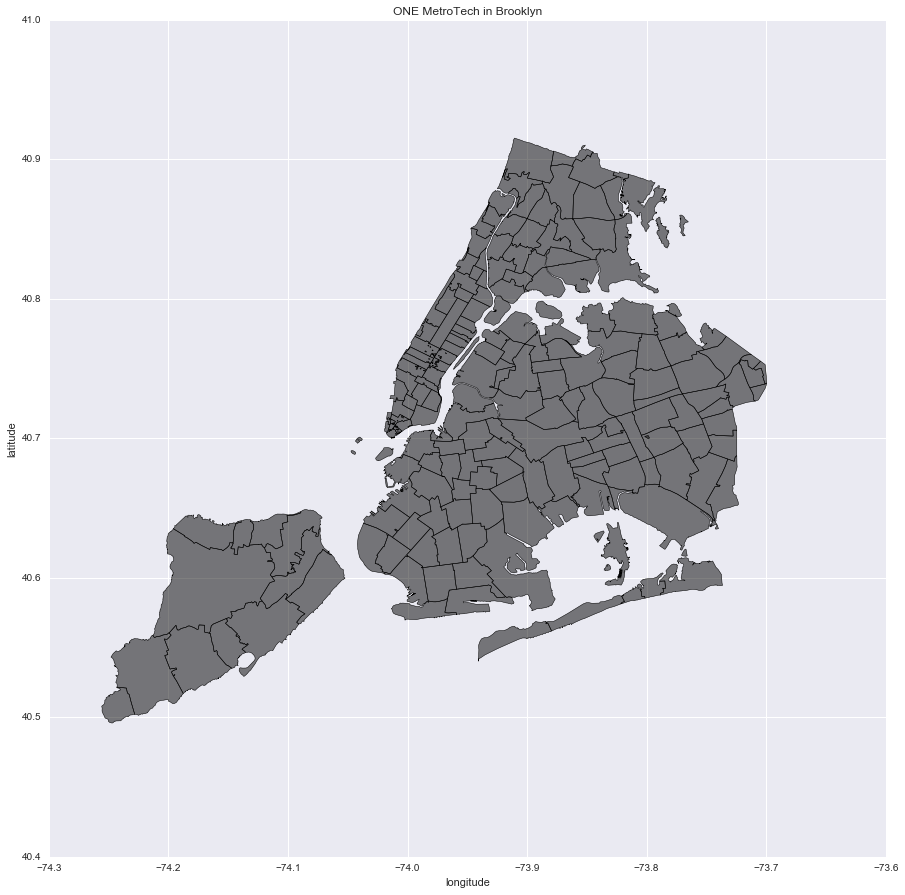

In [387]:
f, ax = pl.subplots(figsize=(15,15))
NYCshpclusters.plot(linewidth=0.5, color='k', ax=ax)
#ct_latlon.iloc[[9062]].plot(linewidth=1, color='r', ax=ax, label='OneMetro Tech Census Block')
#plt.scatter(-73.9866365,40.6931259, s=100, alpha=0.5, label='CUSP')
pl.xlabel('longitude')
pl.ylabel('latitude')
pl.title("ONE MetroTech in Brooklyn")

In [ ]:
5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
6. Compare the results of the 2 algorithms
7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 

you may need to clean your data: for some NYC zip codes there may be no info
    
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation. 
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    

The map of the clusters may look something like this

In [ ]:
from PIL import Image
Image.open("clustermap.png")

And if you use hierarchical clustering and make a dandrogram it may look like this`

In [ ]:
from PIL import Image
Image.open("dandrogram.png")